In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Problem 9

### Part 1: Is Missoula getting hotter?

The `mso_daily_temp.csv` dataset contains temperature records (max. and min. temperatures) for two time periods: 1950-1959 and 2010-2019.

In [2]:
# load Missoula daily weather data
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/mso_daily_temp.csv'
data = pd.read_csv(path,index_col='DATE',parse_dates=True)[['TMAX','TMIN']]
data

,TMAX,TMIN
DATE,,
1950-01-01,25.0,7.0
1950-01-02,18.0,-7.0
1950-01-03,22.0,-12.0
1950-01-04,11.0,-3.0
1950-01-05,9.0,-12.0
...,...,...
2019-12-27,27.0,14.0
2019-12-28,32.0,20.0
2019-12-29,28.0,19.0


Plot the probability distribution of the daily max and min temperatures in September for the two time periods 1950-1959 and 2010-2019.

Hint: use `plot.density()`

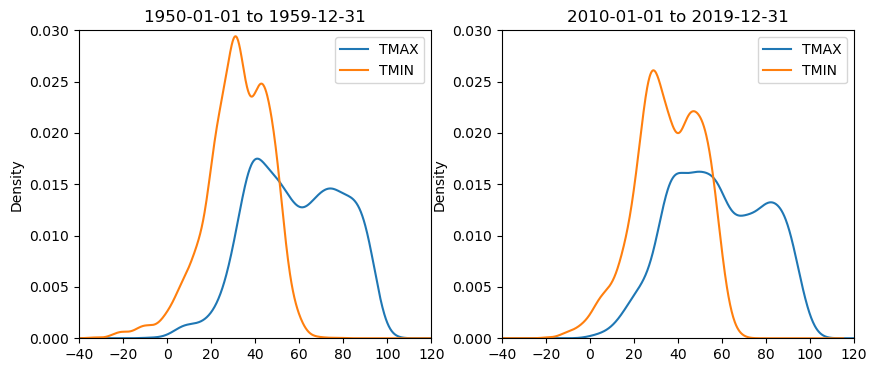

In [8]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

data['1950-01-01':'1959-12-31'].plot.density(ax=ax1)
data['2010-01-01':'2019-12-31'].plot.density(ax=ax2)

ax1.set_title('1950-01-01 to 1959-12-31')
ax2.set_title('2010-01-01 to 2019-12-31')

# scale the axes to be the same
ax1.set_xlim(-40,120)
ax2.set_xlim(-40,120)

ax1.set_ylim(0,0.03)
ax2.set_ylim(0,0.03)

plt.show()

## Part 2: Is the climate in Missoula getting hotter?

The `mso_monthly_temp` dataset contains monthly average temperatures in Missoula county for the time period 1895-2021

In [9]:
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/mso_monthly_temp.csv'
data = pd.read_csv(path, index_col='Date',parse_dates=True)
data

,TAVG
Date,
1895-01-01,14.7
1895-02-01,20.8
1895-03-01,29.1
1895-04-01,39.7
1895-05-01,45.2
...,...
2021-08-01,61.1
2021-09-01,54.3
2021-10-01,43.1


Compute the average temperature of each year.
Assign the results to a new `DataFrame` called ``yearly_data``

In [10]:
yearly_data = data.groupby(data.index.year).mean()

Plot the yearly average temperatures.

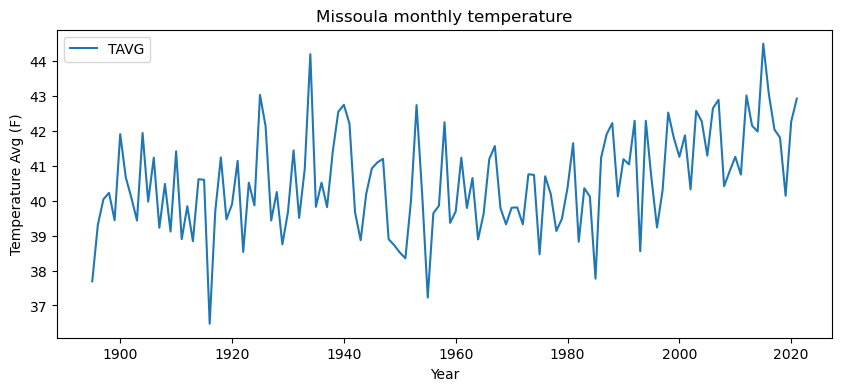

In [15]:
yearly_data.plot(kind='line',figsize=(10,4))
plt.title('Missoula monthly temperature')
plt.xlabel('Year')
plt.ylabel('Temperature Avg (F)')
plt.show()

A location's climate is defined as the *average of its weather over decades* (usually, three decades).
Use Pandas built-in function [`rolling`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html) to compute the average temperature over a three-decades window.
Then, plot the results.

<Axes: xlabel='Date'>

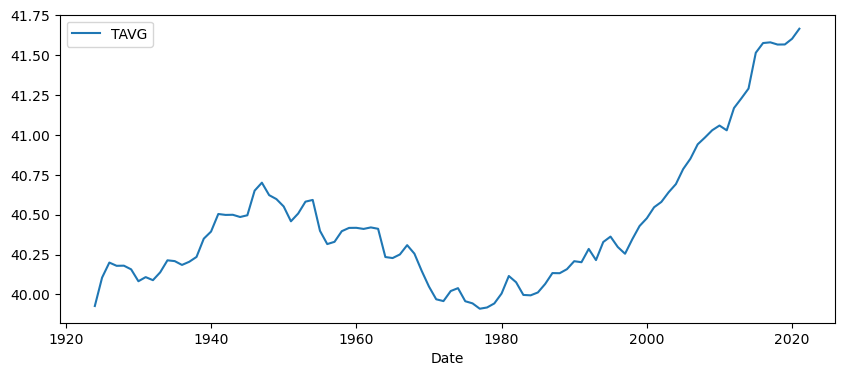

In [21]:
yearly_data.rolling(30).mean().plot(figsize=(10,4))